# 1. 행정동 선택-상권 변화 지표&신생 기업 생존율

# 데이터 불러오기 및 전처리

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rc('font', family='NanumBarunGothic') 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/DATA/

/content/drive/MyDrive/DATA


In [42]:
sd = pd.read_excel("성동구-상권.xls") #성동구
sb = pd.read_excel("성북구-상권.xls") #성북구

In [44]:
sd.tail()

,년도,분기,행정구역,행정구역코드,개업,폐업,상권변화지표,2022년 3분기 3년 생존율
13,2022,3,성동구 행당1동,11200560,115.5,55.9,상권확장,52.2
14,2022,3,성동구 사근동,11200550,103.3,56.3,상권확장,58.1
15,2022,3,성동구 마장동,11200540,143.3,76.4,정체,70.1
16,2022,3,성동구 왕십리도선동,11200535,96.6,54.7,다이나믹,58.8
17,2022,3,성동구 왕십리2동,11200520,112.3,57.0,상권확장,55.4


In [45]:
sb.tail()

,년도,분기,행정구역,행정구역코드,개업,폐업,상권변화지표,2022년 3분기 3년 생존율
16,2022,3,성북구 돈암2동,11290590,110.8,52.3,다이나믹,66.7
17,2022,3,성북구 돈암1동,11290580,113.1,56.9,상권확장,65.4
18,2022,3,성북구 동선동,11290575,110.3,52.2,다이나믹,59.5
19,2022,3,성북구 삼선동,11290555,117.1,56.8,상권확장,69.6
20,2022,3,성북구 성북동,11290525,119.9,65.4,상권확장,68.1


2개의 구를 각각 상권 변화 지표가 '상권 확장'인 것들을 추출하고, 이를 3년 생존율 기준으로 나열하겠습니다.

In [40]:
sd = sd[sd['상권변화지표']=='상권확장'] #성동구
sd.sort_values(by='2022년 3분기 3년 생존율',ascending=False)

,년도,분기,행정구역,행정구역코드,개업,폐업,상권변화지표,2022년 3분기 3년 생존율
6,2022,3,성동구 성수1가1동,11200650,105.5,57.9,상권확장,71.3
9,2022,3,성동구 금호2.3가동,11200615,120.5,61.6,상권확장,68.3
10,2022,3,성동구 금호1가동,11200590,115.5,58.4,상권확장,63.8
3,2022,3,성동구 성수2가3동,11200690,103.4,57.0,상권확장,60.5
14,2022,3,성동구 사근동,11200550,103.3,56.3,상권확장,58.1
11,2022,3,성동구 응봉동,11200580,116.5,58.1,상권확장,57.9
17,2022,3,성동구 왕십리2동,11200520,112.3,57.0,상권확장,55.4
13,2022,3,성동구 행당1동,11200560,115.5,55.9,상권확장,52.2


따라서 성동구에서는 상권변화지표가 '상권확장'인 것 중 가장 3년 생존율이 높은 성수1가1동을 선택합니다.

In [41]:
sb = sb[sb['상권변화지표']=='상권확장'] #성북구
sb.sort_values(by='2022년 3분기 3년 생존율',ascending=False)

,년도,분기,행정구역,행정구역코드,개업,폐업,상권변화지표,2022년 3분기 3년 생존율
19,2022,3,성북구 삼선동,11290555,117.1,56.8,상권확장,69.6
20,2022,3,성북구 성북동,11290525,119.9,65.4,상권확장,68.1
17,2022,3,성북구 돈암1동,11290580,113.1,56.9,상권확장,65.4
8,2022,3,성북구 길음2동,11290685,113.2,59.4,상권확장,63.6
10,2022,3,성북구 정릉4동,11290650,110.9,59.9,상권확장,62.4
12,2022,3,성북구 정릉2동,11290630,121.1,62.8,상권확장,60.6
15,2022,3,성북구 안암동,11290600,113.3,56.8,상권확장,60.6
5,2022,3,성북구 월곡2동,11290725,117.4,55.7,상권확장,58.3


따라서 성북구에서는 상권변화지표가 '상권확장'인 것 중 가장 3년 생존율이 높은 삼선동을 선택합니다.

# 2. 업종 선택-연령대 분석

# 데이터 불러오기 및 전처리

In [4]:
earning = pd.read_csv("서울추정매출.csv", encoding = 'euc_kr')
visitor = pd.read_csv("서울생활.csv", encoding = 'euc-kr')
worker = pd.read_csv("서울직장.csv",encoding = 'euc-kr')
resident = pd.read_csv("서울상주.csv",encoding = 'euc-kr')
area = pd.read_csv("상권영역.csv", encoding = 'euc-kr')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
useless = earning[earning['점포수']=='*'].index
earning = earning.drop(useless)
df_raw = pd.merge(earning, area, how = 'inner')
df_raw

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,기준_년월_코드,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
0,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,9548586,2264,66,34,11,11,11,11,22,19,15,0,0,20,38,40,1,4,96,10,63,18,5,4,1,6305806,3242780,1088213,1039632,1020200,1093071,2064690,1804783,1437997,0,0,1928664,3670291,3833037,116594,414231,9134355,957544,6024269,1683948,468040,351630,63155,1493,771,272,259,209,271,482,422,349,0,0,442,878,915,29,102,2162,225,1414,409,118,83,15,6,202112,205310,445727,11680,11680580,NaN
1,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,103492276,370,100,0,0,100,0,0,0,0,0,0,0,100,0,0,0,100,0,0,0,0,0,100,0,103492276,0,0,103492276,0,0,0,0,0,0,0,103492276,0,0,0,103492276,0,0,0,0,0,103492276,0,370,0,0,370,0,0,0,0,0,0,0,370,0,0,0,370,0,0,0,0,0,370,0,4,202112,205310,445727,11680,11680580,NaN
2,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300032,가전제품,55855797,130,100,0,0,0,100,0,0,0,0,0,0,0,100,0,0,0,100,0,0,100,0,0,0,55855797,0,0,0,55855797,0,0,0,0,0,0,0,55855797,0,0,0,55855797,0,0,55855797,0,0,0,130,0,0,0,130,0,0,0,0,0,0,0,130,0,0,0,130,0,0,130,0,0,0,6,202112,205310,445727,11680,11680580,NaN
3,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300031,가구,8443170204,4794,50,50,12,10,9,6,13,23,27,0,12,27,35,26,0,51,49,0,3,9,21,22,45,4215188146,4227982058,978751765,849755313,714767223,541608872,1130304973,1937766368,2290215690,0,1007652609,2285528114,2962688993,2187300488,0,4274047183,4169123021,0,236141046,779970347,1779869072,1866924054,3780265685,2748,2046,599,458,353,669,669,1023,1023,0,564,1340,1834,1056,0,2151,2643,0,105,388,987,1164,2150,6,202112,205310,445727,11680,11680580,NaN
4,2022,3,U,관광특구,1001496,강남 마이스 관광특구,CS300028,화초,576420408,8392,73,27,7,13,8,24,22,11,16,0,5,33,34,28,0,69,31,0,21,31,30,10,9,423123457,153296951,40289384,72484368,46921785,135334239,128093681,63890880,89406071,0,27953322,191437167,196090767,160880979,58173,287529684,129869311,698075,85940201,129354035,123565972,41541851,36298860,5529,2863,546,1070,909,1481,1523,1153,1710,0,520,2392,2806,2668,6,4326,3023,72,1757,2508,1961,650,398,5,202112,205310,445727,11680,11680580,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70620,2022,1,A,골목상권,2110628,신목동역,CS200028,미용실,28586759,1139,58,42,0,18,10,16,15,15,27,0,4,22,40,34,0,61,39,0,24,32,18,17,10,16697194,11889565,13743,5158330,2789023,4518432,4217666,4264829,7624736,0,1152738,6304982,11466773,9662266,0,17431417,11155342,0,6731988,9207709,5022776,4835262,2789024,706,433,5,240,124,213,124,143,290,0,69,298,356,416,0,858,281,0,184,422,233,198,102,3,202112,189375,449531,11470,11470520,NaN
70621,2022,1,A,골목상권,2110628,신목동역,CS100010,커피-음료,2396503,130,100,0,21,35,0,11,32,0,0,0,0,47,34,19,0,46,54,0,35,5,19,41,0,2396503,0,511686,848491,0,272035,764291,0,0,0,0,1120527,822584,453392,0,861446,1023371,0,660657,97156,362714,764290,0,130,0,13,52,0,26,39,0,0

# 성동구-성수1가1동


In [7]:
df = df_raw[df_raw['행정동_코드']==11200650]

In [8]:
drop = df['서비스_업종_코드_명'].isin(['한의원','치과의원','일반의원','의약품'])
df = df[~drop]

In [9]:
age = df[['상권_코드_명','행정동_코드','시군구_코드','서비스_업종_코드_명','분기당_매출_금액','연령대_10_매출_금액','연령대_20_매출_금액','연령대_30_매출_금액','연령대_40_매출_금액','연령대_50_매출_금액','연령대_60_이상_매출_금액','점포수']]
age

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,분기당_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포수
30558,서울숲역,11200650,11200,전자상거래업,1819649159,0,0,1002817386,212140549,116949277,487741947,8
30559,서울숲역,11200650,11200,화장품,1785956982,1741103,33255073,79423327,1114935785,195525896,361075798,5
30560,서울숲역,11200650,11200,일반의류,731423328,20996192,522049306,167381638,20996192,0,0,8
30561,서울숲역,11200650,11200,편의점,572245144,4540279,144615348,193672103,99238904,60615907,29919371,3
30562,서울숲역,11200650,11200,슈퍼마켓,165000000,495303,61002979,54470674,14791300,12927997,11477761,15
...,...,...,...,...,...,...,...,...,...,...,...,...
67679,성수1가1동주민센터,11200650,11200,분식전문점,175683425,1463855,26143080,44523212,35415665,32006976,9543878,4
67680,성수1가1동주민센터,11200650,11200,한식음식점,187807555,57487,11914018,24584703,23791976,33477348,21689633,5
67681,서울숲역 1번,11200650,11200,커피-음료,110462751,1567851,38750025,30818039,15871292,8200411,4831667,7
67682,서울숲역 1번,11200650,11200,커피-음료,123993247,1600875,42758936,35075026,17719512,9117689,4546705,6


In [10]:
age10 = age.groupby(['서비스_업종_코드_명'])['연령대_10_매출_금액'].sum().sort_values()
age20 = age.groupby(['서비스_업종_코드_명'])['연령대_20_매출_금액'].sum().sort_values()
age30 = age.groupby(['서비스_업종_코드_명'])['연령대_30_매출_금액'].sum().sort_values()
age40 = age.groupby(['서비스_업종_코드_명'])['연령대_40_매출_금액'].sum().sort_values()
age50 = age.groupby(['서비스_업종_코드_명'])['연령대_50_매출_금액'].sum().sort_values()
age60 = age.groupby(['서비스_업종_코드_명'])['연령대_60_이상_매출_금액'].sum().sort_values()
age10.to_csv('age10')
age20.to_csv('age20')
age30.to_csv('age30')
age40.to_csv('age40')
age50.to_csv('age50')
age60.to_csv('age60')

In [11]:
age1d = pd.read_csv('age10')
age2d = pd.read_csv('age20')
age3d = pd.read_csv('age30')
age4d = pd.read_csv('age40')
age5d = pd.read_csv('age50')
age6d = pd.read_csv('age60')

In [12]:
ageNew = pd.merge(age1d, age2d, on='서비스_업종_코드_명',how='inner')
ageNew = pd.merge(ageNew, age3d, on='서비스_업종_코드_명',how='inner')
ageNew = pd.merge(ageNew, age4d, on='서비스_업종_코드_명',how='inner')
ageNew = pd.merge(ageNew, age5d, on='서비스_업종_코드_명',how='inner')
ageNew = pd.merge(ageNew, age6d, on='서비스_업종_코드_명',how='inner')

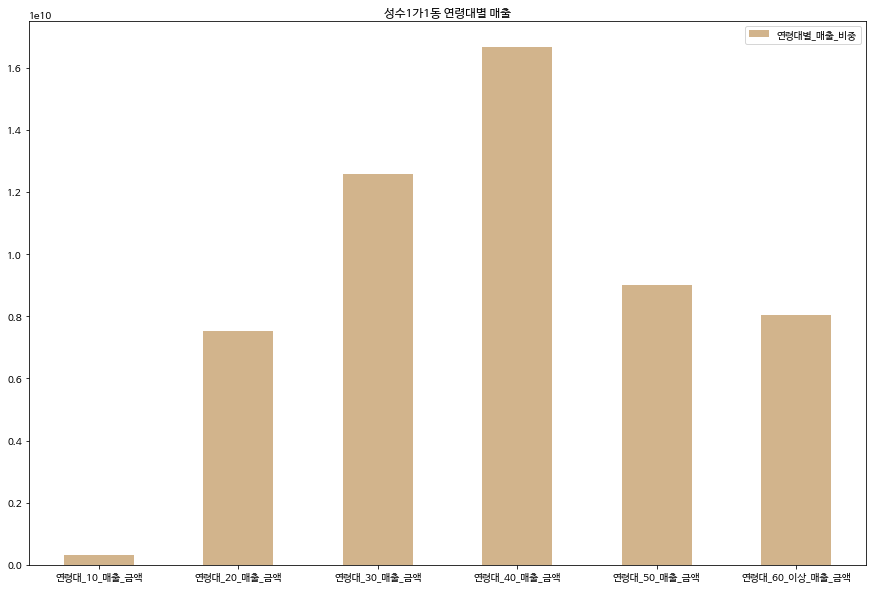

In [13]:
total = ageNew.sum()
total = pd.DataFrame(total)
total.drop('서비스_업종_코드_명',inplace=True)
total.columns = ['연령대별_매출_비중']
total.plot(kind='bar',title=('성수1가1동 연령대별 매출'),figsize = (15,10),rot=0,color='tan')

-> 연령대별 매출 비중 분석 결과 성동구 성수1가1동은 3040을 타겟으로 설정하는 것이 합리적으로 보인다.

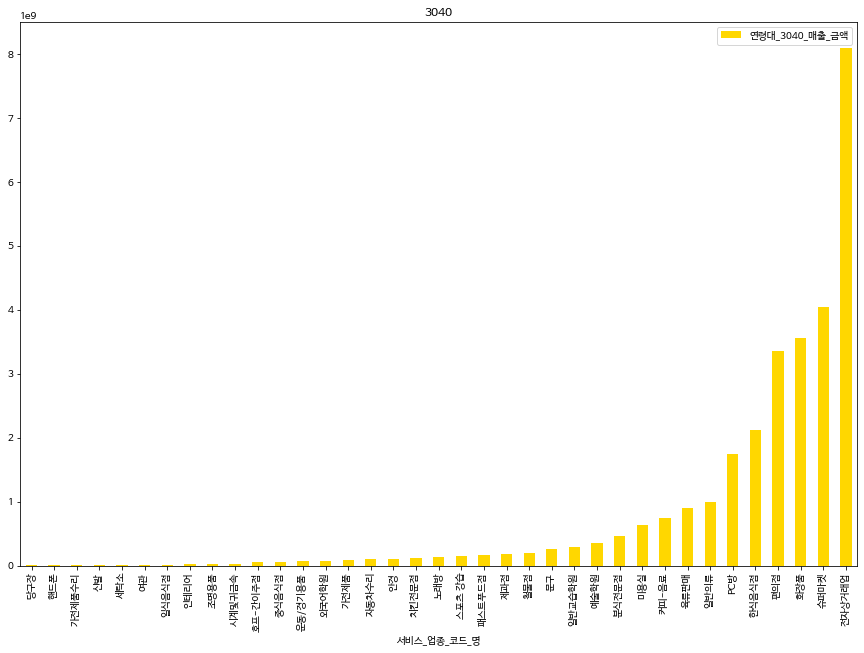

In [15]:
ageNew['연령대_3040_매출_금액'] = ageNew['연령대_30_매출_금액'] + ageNew['연령대_40_매출_금액']
age3040 = ageNew.sort_values(by='연령대_3040_매출_금액')
age3040 = age3040[['서비스_업종_코드_명','연령대_3040_매출_금액']]
age3040 = pd.DataFrame(age3040)
age3040.set_index('서비스_업종_코드_명',inplace=True)
age3040.plot(kind='bar', title='3040',figsize = (15,10),color='gold')

-> 성동구 성수1가1동 3040의 선호 업종은 전자상거래업, 슈퍼마켓, 화장품, 편의점, 한식음식점, PC방, 일반의류 등이 있었다. 다른 분석과 종합한 결과 최종 선정 업종은 '화장품'

성수1가1동 화장품 업종의 사업 전략을 구상하기 위하여 연령대별 매출을 분석해보자.

In [16]:
ageNew.drop('연령대_3040_매출_금액',axis=1,inplace=True)

In [17]:
cm = ageNew[ageNew['서비스_업종_코드_명']=='화장품']
cm = np.array(cm)
cm = np.delete(cm,0)

In [19]:
sizes = cm
labels = ['10대','20대', '30대','40대','50대','60대 이상']
colors = ['lightpink', 'cornsilk', 'saddlebrown','gold','orange','navajowhite']
explodes = (0, 0, 0)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

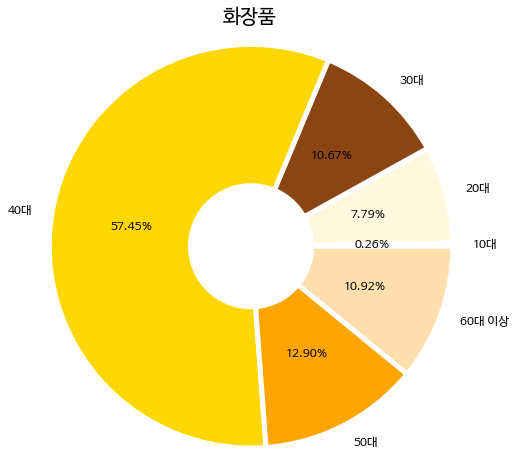

In [21]:
plt.pie(sizes,
        labels = labels,
        colors = colors,
        autopct = "%1.2f%%",
        shadow = False,
        startangle = 0, # 시작 각도
        textprops = {'fontsize':12,},
        wedgeprops = wedgeprops)
plt.axis('equal')
plt.title('화장품',size=20)
plt.rcParams['figure.figsize']=(8,8)
plt.show()

-> 40대가 과반 이상을 차지하고 있으므로 고급 브랜드 운영이 좋아보임.

# 성북구-삼선동

In [22]:
df = df_raw[df_raw['행정동_코드']==11290555]

In [23]:
drop = df['서비스_업종_코드_명'].isin(['한의원','치과의원','일반의원','의약품'])
df = df[~drop]

In [24]:
age = df[['상권_코드_명','행정동_코드','시군구_코드','서비스_업종_코드_명','분기당_매출_금액','연령대_10_매출_금액','연령대_20_매출_금액','연령대_30_매출_금액','연령대_40_매출_금액','연령대_50_매출_금액','연령대_60_이상_매출_금액','점포수']]
age

,상권_코드_명,행정동_코드,시군구_코드,서비스_업종_코드_명,분기당_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,점포수
7829,돈암시장(돈암제일시장),11290555,11290,일반의류,36378849,0,2164439,1823933,2546714,10353138,19490625,8
7830,돈암시장(돈암제일시장),11290555,11290,반찬가게,1222026724,0,23078533,65521826,160440483,693153531,279832351,9
7831,돈암시장(돈암제일시장),11290555,11290,청과상,865729966,438492,33888100,72333457,149280574,268303110,317010814,5
7832,돈암시장(돈암제일시장),11290555,11290,수산물판매,953888208,0,15982882,35583995,66840373,242666456,525139435,5
7833,돈암시장(돈암제일시장),11290555,11290,육류판매,921842929,369550,32017721,52352137,119972646,292035289,363485820,6
...,...,...,...,...,...,...,...,...,...,...,...,...
61807,한성대입구역 3번,11290555,11290,치킨전문점,44633312,1239206,7866994,7568182,11833084,9913411,5903655,5
61808,한성대입구역 3번,11290555,11290,패스트푸드점,76346061,888679,14688571,12355529,18025924,16433491,12344422,8
61809,한성대입구역 3번,11290555,11290,제과점,3260107,27718,540412,489154,722885,978953,500985,3
61810,한성대입구역 3번,11290555,11290,일식음식점,121593479,1200323,19344058,21296273,19666249,26399216,17834237,6


In [25]:
age10 = age.groupby(['서비스_업종_코드_명'])['연령대_10_매출_금액'].sum().sort_values()
age20 = age.groupby(['서비스_업종_코드_명'])['연령대_20_매출_금액'].sum().sort_values()
age30 = age.groupby(['서비스_업종_코드_명'])['연령대_30_매출_금액'].sum().sort_values()
age40 = age.groupby(['서비스_업종_코드_명'])['연령대_40_매출_금액'].sum().sort_values()
age50 = age.groupby(['서비스_업종_코드_명'])['연령대_50_매출_금액'].sum().sort_values()
age60 = age.groupby(['서비스_업종_코드_명'])['연령대_60_이상_매출_금액'].sum().sort_values()
age10.to_csv('age10')
age20.to_csv('age20')
age30.to_csv('age30')
age40.to_csv('age40')
age50.to_csv('age50')
age60.to_csv('age60')

In [26]:
age1d = pd.read_csv('age10')
age2d = pd.read_csv('age20')
age3d = pd.read_csv('age30')
age4d = pd.read_csv('age40')
age5d = pd.read_csv('age50')
age6d = pd.read_csv('age60')

In [27]:
ageNew = pd.merge(age1d, age2d, on='서비스_업종_코드_명',how='inner')
ageNew = pd.merge(ageNew, age3d, on='서비스_업종_코드_명',how='inner')
ageNew = pd.merge(ageNew, age4d, on='서비스_업종_코드_명',how='inner')
ageNew = pd.merge(ageNew, age5d, on='서비스_업종_코드_명',how='inner')
ageNew = pd.merge(ageNew, age6d, on='서비스_업종_코드_명',how='inner')

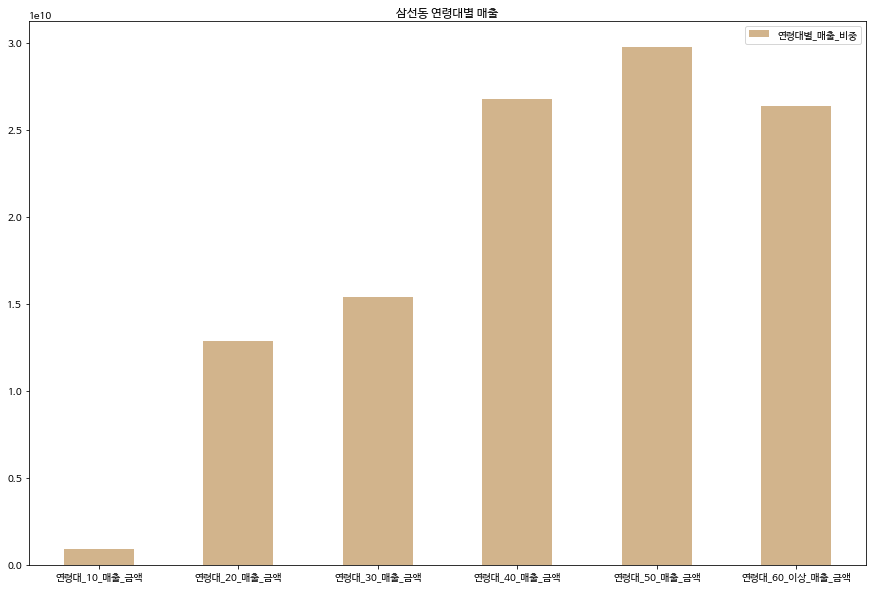

In [28]:
total = ageNew.sum()
total = pd.DataFrame(total)
total.drop('서비스_업종_코드_명',inplace=True)
total.columns = ['연령대별_매출_비중']
total.plot(kind='bar',title=('삼선동 연령대별 매출'),figsize = (15,10),rot=0,color='tan')

-> 연령대별 매출 비중 분석 결과 성북구 삼선동은 4050을 타겟으로 설정하는 것이 합리적으로 보인다.

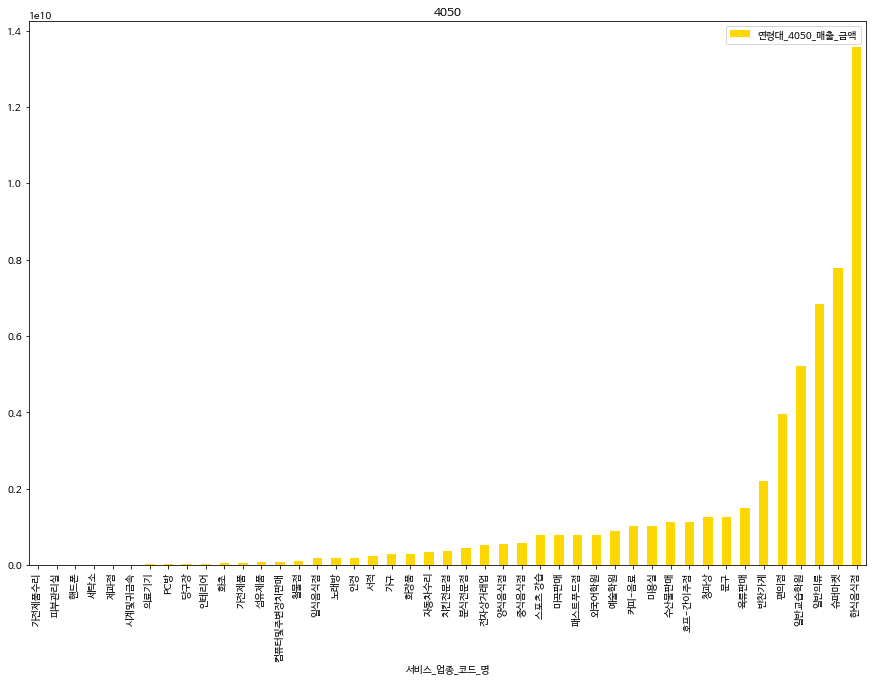

In [29]:
ageNew['연령대_4050_매출_금액'] = ageNew['연령대_40_매출_금액'] + ageNew['연령대_50_매출_금액']
age4050 = ageNew.sort_values(by='연령대_4050_매출_금액')
age4050 = age4050[['서비스_업종_코드_명','연령대_4050_매출_금액']]
age4050 = pd.DataFrame(age4050)
age4050.set_index('서비스_업종_코드_명',inplace=True)
age4050.plot(kind='bar', title='4050',figsize = (15,10),color='gold')

-> 성북구 삼선동 4050의 선호 업종은 한식음식점, 슈퍼마켓, 일반의류, 일반교습학원, 편의점, 반찬가게, 육류판매 등이 있었다. 다른 분석과 종합한 결과 최종 선정 업종은 '반찬가게'

삼선동 화장품 업종의 사업 전략을 구상하기 위하여 연령대별 매출을 분석해보자.

In [30]:
ageNew.drop('연령대_4050_매출_금액',axis=1,inplace=True)

In [31]:
bc = ageNew[ageNew['서비스_업종_코드_명']=='반찬가게']
bc = np.array(bc)
bc = np.delete(bc,0)

In [32]:
sizes = bc
labels = ['10대','20대', '30대','40대','50대','60대 이상']
colors = ['lightpink', 'cornsilk', 'saddlebrown','gold','orange','navajowhite']
explodes = (0, 0, 0)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

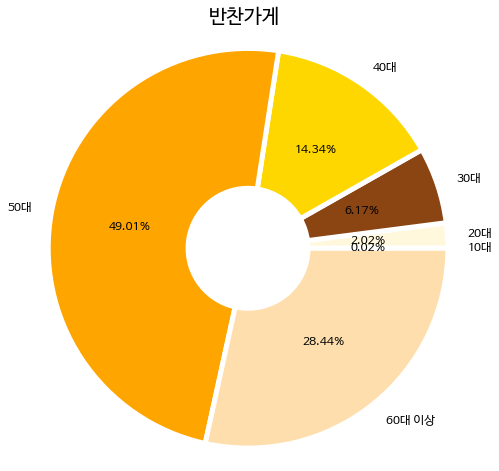

In [33]:
plt.pie(sizes,
        labels = labels,
        colors = colors,
        autopct = "%1.2f%%",
        shadow = False,
        startangle = 0,
        textprops = {'fontsize':12,},
        wedgeprops = wedgeprops)
plt.axis('equal')
plt.title('반찬가게',size=20)
plt.rcParams['figure.figsize']=(8,8)
plt.show()

-> 50대와 더불어 60대 이상 매출이 높으므로 노인을 위한 연화식 느낌으로 특별한 반찬을 운영하는 것이 좋아보인다.